> **Jupyter slideshow:** This notebook can be displayed as slides. To view it as a slideshow in your browser, run the following cell:

> `> jupyter nbconvert [this_notebook.ipynb] --to slides --post serve`
 
> To toggle off the slideshow cell formatting, click the `CellToolbar` button, then `View > Cell Toolbar > None`.

<img src="../images/shell-logo.png" width="50" height="50" align="right"/>

<img src="../images/di.png" width="50" height="50" align="right"/>

# Feature Engineering

In [17]:
# ! jupyter nbconvert Python_intro.ipynb --to slides --post serve

## Learning Objectives
*In this lesson, we will go over the following:*

- Introduction to Feature Engineering.
- Application of Feature Engineering
- Feature Engineering with Categorical Columns.
- Feature Engineering with Numerical Columns.
- Feaure Engineering with Business and Domain Understanding.

## Introduction: Manual Feature Engineering

In this notebook, we will explore making features by hand for a Dataset.

- Manual feature engineering can be a tedious process (which is why we use automated feature engineering with featuretools!) and often relies on domain expertise. 

- Since we are limited to domain knowledge of diffirent fields and what makes a person likely to default, we will instead concentrate of getting as much info as possible into the final training dataframe. 

- The idea is that the model will then pick up on which features are important rather than us having to decide that. Basically, our approach is to make as many features as possible and then give them all to the model to use! Later, we can perform feature reduction using the feature importances from the model or other techniques such as PCA. 

In [177]:
# pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# matplotlib and seaborn for plotting
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)

## Ideal Data Science Pipeline

1. Missing Value Analysis
2. Outlier Analysis
3. EDA ( Exploratory Data Analysis ) 
4. Feature Engineering
5. Feature Selection
6. Preparing Data for ML
   - Feature Encoding
   - Scaling/Normalisation
   - DImensionality Reduction
   - Train Test Split
   
7. Training Machine Learning Models
8. Evaluating Models
9. Iterating/Improving

dataset.json

In [20]:
filepath = "../data/dataset.json"

In [124]:
df = pd.read_json( filepath )

In [125]:
df.head()

,browser,os,locale,user_id,gender,location,sites,time,date,nSites,nUniqueSites,totalLenght,firstSite,City,Country
0,Chrome,Windows 8,de-DE,164,m,Canada/Toronto,"[{'site': 'lenta.ru', 'length': 296}, {'site':...",03:57:00,2016-08-14,14,12,1839,lenta.ru,Toronto,Canada
1,Chrome,Windows 10,pt-PT,99,f,Netherlands/Amsterdam,"[{'site': 'windowsupdate.com', 'length': 56}, ...",13:52:00,2016-05-31,12,12,1839,windowsupdate.com,Amsterdam,Netherlands
2,Chrome,Windows 10,bg-BG,28,m,Brazil/Rio de Janeiro,"[{'site': 'slack.com', 'length': 158}, {'site'...",17:40:00,2019-04-15,12,12,1839,slack.com,Rio de Janeiro,Brazil
3,Internet Explorer,Ubuntu,en-US,163,f,New Zealand/Auckland,"[{'site': 'amazon.com', 'length': 168}, {'site...",20:23:00,2018-03-25,15,12,1839,amazon.com,Auckland,New Zealand
4,Firefox,Debian,ro-RO,177,f,New Zealand/Auckland,"[{'site': 'vk.com', 'length': 43}, {'site': 'm...",01:10:00,2018-09-08,11,12,1839,vk.com,Auckland,New Zealand


In [23]:
df.shape

(160000, 9)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   browser   160000 non-null  object        
 1   os        160000 non-null  object        
 2   locale    160000 non-null  object        
 3   user_id   160000 non-null  int64         
 4   gender    160000 non-null  object        
 5   location  160000 non-null  object        
 6   sites     160000 non-null  object        
 7   time      160000 non-null  object        
 8   date      160000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 11.0+ MB


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,160000.0,99.5,57.734486,0.0,49.75,99.5,149.25,199.0


### 1. Missing Value Analysis

In [29]:
df.isna().sum() / df.shape[0]

browser     0.0
os          0.0
locale      0.0
user_id     0.0
gender      0.0
location    0.0
sites       0.0
time        0.0
date        0.0
dtype: float64

### 2. Feature Engineer ( Pre Processing)

**Sites columns**
- count of sites
- count of unique sites
- total time ( in seconds) - ❌ not useful
- top 5 longest sites accessed per user

In [35]:
df.head()

,browser,os,locale,user_id,gender,location,sites,time,date
0,Chrome,Windows 8,de-DE,164,m,Canada/Toronto,"[{'site': 'lenta.ru', 'length': 296}, {'site':...",03:57:00,2016-08-14
1,Chrome,Windows 10,pt-PT,99,f,Netherlands/Amsterdam,"[{'site': 'windowsupdate.com', 'length': 56}, ...",13:52:00,2016-05-31
2,Chrome,Windows 10,bg-BG,28,m,Brazil/Rio de Janeiro,"[{'site': 'slack.com', 'length': 158}, {'site'...",17:40:00,2019-04-15
3,Internet Explorer,Ubuntu,en-US,163,f,New Zealand/Auckland,"[{'site': 'amazon.com', 'length': 168}, {'site...",20:23:00,2018-03-25
4,Firefox,Debian,ro-RO,177,f,New Zealand/Auckland,"[{'site': 'vk.com', 'length': 43}, {'site': 'm...",01:10:00,2018-09-08


In [48]:
def _func( x ):
    return x.split("/")[0], x.split("/")[1]

In [55]:
#lambda function
_f = (lambda x : (x.split("/")[0], x.split("/")[1])  )

In [61]:
df['nSites'] = df.sites.apply( lambda x : len(x) )

In [62]:
def get_unique_site(x):
    temp_list = []
    for i in x:
        temp_list.append(i['site'])
    
    return len(np.unique(temp_list))

%timeit df['count_unique_sites'] = df.sites.apply(lambda x : get_unique_site(x) )

4.13 s ± 80.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [65]:
temp = df.sites[0]

In [75]:
# ls = [12,312,321,3,12,434,34,31]
# add5 = lambda x : x + 5

# list (map( add5, ls ))

# #for i in range(len(ls)):
# #     ls[i] = ls[i] + 5
    
# # ls

[17, 317, 326, 8, 17, 439, 39, 36]

In [155]:
def get_unique_site(x):
    f = lambda x : x['site']
    return len(np.unique(list(map(f, x))))


df['nUniqueSites'] = df.sites.map(lambda x : get_unique_site(x) )

In [85]:
# sum(ls)

In [154]:
def get_sum(x):
    f = lambda x : x['length']
    return sum(list(map(f, x)))


df['totalLenght'] = df.sites.map(lambda x : get_sum(x) )

In [145]:
def _extract(x, pos):
    if len(x) > pos:
        return x[pos]['site']
    else:
        return np.nan
df['firstSite'] = df.sites.apply( lambda x : x[0]['site'])
df['secondSite'] = df.sites.apply( lambda x : _extract( x,1 ))
df['thirdSite'] = df.sites.apply( lambda x : _extract( x,2))

<AxesSubplot:>

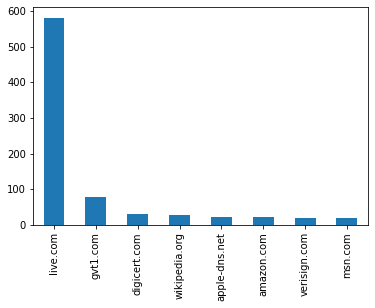

In [116]:
df[ df.user_id == 48].firstSite.value_counts().plot.bar()

In [117]:
df.head()

,browser,os,locale,user_id,gender,location,sites,time,date,nSites,nUniqueSites,totalLenght,firstSite
0,Chrome,Windows 8,de-DE,164,m,Canada/Toronto,"[{'site': 'lenta.ru', 'length': 296}, {'site':...",03:57:00,2016-08-14,14,12,1839,lenta.ru
1,Chrome,Windows 10,pt-PT,99,f,Netherlands/Amsterdam,"[{'site': 'windowsupdate.com', 'length': 56}, ...",13:52:00,2016-05-31,12,12,1839,windowsupdate.com
2,Chrome,Windows 10,bg-BG,28,m,Brazil/Rio de Janeiro,"[{'site': 'slack.com', 'length': 158}, {'site'...",17:40:00,2019-04-15,12,12,1839,slack.com
3,Internet Explorer,Ubuntu,en-US,163,f,New Zealand/Auckland,"[{'site': 'amazon.com', 'length': 168}, {'site...",20:23:00,2018-03-25,15,12,1839,amazon.com
4,Firefox,Debian,ro-RO,177,f,New Zealand/Auckland,"[{'site': 'vk.com', 'length': 43}, {'site': 'm...",01:10:00,2018-09-08,11,12,1839,vk.com


In [120]:
#extracting city and country
df['City'] = df.location.str.split("/").str[1]
df['Country'] = df.location.str.split("/").str[0]

In [121]:
df.head()

,browser,os,locale,user_id,gender,location,sites,time,date,nSites,nUniqueSites,totalLenght,firstSite,City,Country
0,Chrome,Windows 8,de-DE,164,m,Canada/Toronto,"[{'site': 'lenta.ru', 'length': 296}, {'site':...",03:57:00,2016-08-14,14,12,1839,lenta.ru,Toronto,Canada
1,Chrome,Windows 10,pt-PT,99,f,Netherlands/Amsterdam,"[{'site': 'windowsupdate.com', 'length': 56}, ...",13:52:00,2016-05-31,12,12,1839,windowsupdate.com,Amsterdam,Netherlands
2,Chrome,Windows 10,bg-BG,28,m,Brazil/Rio de Janeiro,"[{'site': 'slack.com', 'length': 158}, {'site'...",17:40:00,2019-04-15,12,12,1839,slack.com,Rio de Janeiro,Brazil
3,Internet Explorer,Ubuntu,en-US,163,f,New Zealand/Auckland,"[{'site': 'amazon.com', 'length': 168}, {'site...",20:23:00,2018-03-25,15,12,1839,amazon.com,Auckland,New Zealand
4,Firefox,Debian,ro-RO,177,f,New Zealand/Auckland,"[{'site': 'vk.com', 'length': 43}, {'site': 'm...",01:10:00,2018-09-08,11,12,1839,vk.com,Auckland,New Zealand


In [130]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day

In [147]:
df.head()

,browser,os,locale,user_id,gender,location,sites,time,date,nSites,nUniqueSites,totalLenght,firstSite,City,Country,year,month,day,secondSite,thirdSite
0,Chrome,Windows 8,de-DE,164,m,Canada/Toronto,"[{'site': 'lenta.ru', 'length': 296}, {'site':...",03:57:00,2016-08-14,14,12,1839,lenta.ru,Toronto,Canada,2016,8,14,lenta.ru,vk.com
1,Chrome,Windows 10,pt-PT,99,f,Netherlands/Amsterdam,"[{'site': 'windowsupdate.com', 'length': 56}, ...",13:52:00,2016-05-31,12,12,1839,windowsupdate.com,Amsterdam,Netherlands,2016,5,31,amazon.com,live.com
2,Chrome,Windows 10,bg-BG,28,m,Brazil/Rio de Janeiro,"[{'site': 'slack.com', 'length': 158}, {'site'...",17:40:00,2019-04-15,12,12,1839,slack.com,Rio de Janeiro,Brazil,2019,4,15,slack.com,mail.google.com
3,Internet Explorer,Ubuntu,en-US,163,f,New Zealand/Auckland,"[{'site': 'amazon.com', 'length': 168}, {'site...",20:23:00,2018-03-25,15,12,1839,amazon.com,Auckland,New Zealand,2018,3,25,microsoft.com,gvt2.com
4,Firefox,Debian,ro-RO,177,f,New Zealand/Auckland,"[{'site': 'vk.com', 'length': 43}, {'site': 'm...",01:10:00,2018-09-08,11,12,1839,vk.com,Auckland,New Zealand,2018,9,8,mail.google.com,lenta.ru


### 3.  Outlier Analysis

In [148]:
df.head()

,browser,os,locale,user_id,gender,location,sites,time,date,nSites,nUniqueSites,totalLenght,firstSite,City,Country,year,month,day,secondSite,thirdSite
0,Chrome,Windows 8,de-DE,164,m,Canada/Toronto,"[{'site': 'lenta.ru', 'length': 296}, {'site':...",03:57:00,2016-08-14,14,12,1839,lenta.ru,Toronto,Canada,2016,8,14,lenta.ru,vk.com
1,Chrome,Windows 10,pt-PT,99,f,Netherlands/Amsterdam,"[{'site': 'windowsupdate.com', 'length': 56}, ...",13:52:00,2016-05-31,12,12,1839,windowsupdate.com,Amsterdam,Netherlands,2016,5,31,amazon.com,live.com
2,Chrome,Windows 10,bg-BG,28,m,Brazil/Rio de Janeiro,"[{'site': 'slack.com', 'length': 158}, {'site'...",17:40:00,2019-04-15,12,12,1839,slack.com,Rio de Janeiro,Brazil,2019,4,15,slack.com,mail.google.com
3,Internet Explorer,Ubuntu,en-US,163,f,New Zealand/Auckland,"[{'site': 'amazon.com', 'length': 168}, {'site...",20:23:00,2018-03-25,15,12,1839,amazon.com,Auckland,New Zealand,2018,3,25,microsoft.com,gvt2.com
4,Firefox,Debian,ro-RO,177,f,New Zealand/Auckland,"[{'site': 'vk.com', 'length': 43}, {'site': 'm...",01:10:00,2018-09-08,11,12,1839,vk.com,Auckland,New Zealand,2018,9,8,mail.google.com,lenta.ru


In [156]:
df.select_dtypes( exclude=['object','datetime'])

,user_id,nSites,nUniqueSites,totalLenght,year,month,day
0,164,14,12,1839,2016,8,14
1,99,12,12,1430,2016,5,31
2,28,12,10,1142,2019,4,15
3,163,15,15,1648,2018,3,25
4,177,11,11,1045,2018,9,8
...,...,...,...,...,...,...,...
159995,74,12,11,1185,2018,10,15
159996,163,12,12,2114,2016,3,23
159997,114,15,14,1688,2019,3,3
159998,48,15,15,1984,2016,12,14


<AxesSubplot:>

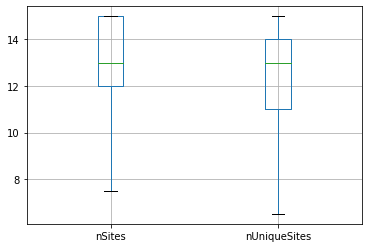

In [167]:
df[['nSites','nUniqueSites']].boxplot()

Method of Handling Outliers
1. Removing Them
2. Imputing Them -> assign the upper whisker or lower whisker value
3. Using Robust ML Algo
4. Regularisation

In [158]:
q1 = df[['nSites','nUniqueSites']].quantile(0.25)
q3 = df[['nSites','nUniqueSites']].quantile(0.75)

IQR = q3 - q1
IQR

nSites          3.0
nUniqueSites    3.0
dtype: float64

In [159]:
upper = q3 + 1.5*IQR
lower = q1 - 1.5*IQR

In [166]:
for col in ['nSites','nUniqueSites']:
    print ("FInding for Column", col)
    df.loc[ (df[col] > upper[col]), col ] = upper[col]
    df.loc[ (df[col] < lower[col]), col ] = lower[col]

FInding for Column nSites
FInding for Column nUniqueSites


### 3. EDA

In [173]:
df['target'] = (df.user_id != 0)

In [180]:
df.columns

Index(['browser', 'os', 'locale', 'user_id', 'gender', 'location', 'sites',
       'time', 'date', 'nSites', 'nUniqueSites', 'totalLenght', 'firstSite',
       'City', 'Country', 'year', 'month', 'day', 'secondSite', 'thirdSite',
       'target'],
      dtype='object')

In [235]:
websitebyjoe = np.unique(df[ df.target == 0][['firstSite','secondSite','thirdSite']].values).tolist()
df.loc[~df.firstSite.isin(websitebyjoe), 'firstSite'] = "anything"
df.loc[~df.secondSite.isin(websitebyjoe), 'secondSite'] = "anything"
df.loc[~df.thirdSite.isin(websitebyjoe), 'thirdSite'] = "anything"

In [236]:
df.firstSite.value_counts()

anything           103921
mail.google.com      8926
lenta.ru             8466
youtube.com          7704
vk.com               7598
slack.com            6882
wikipedia.org        5756
amazon.com           5504
toptal.com           5243
Name: firstSite, dtype: int64

In [237]:
X = df[['browser', 'os', 'locale', 'gender', 'nSites', 'nUniqueSites', 'totalLenght',
       'City', 'Country', 'year', 'month', 'day', 'firstSite','secondSite', 'thirdSite',]]
y = df.target

<AxesSubplot:ylabel='target'>

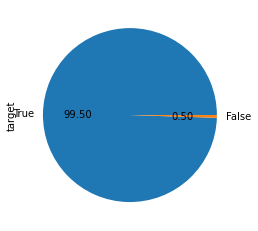

In [238]:
y.value_counts().plot.pie(autopct = "%.2f")

Handling Target Imbalance

### Label Encoding

In [239]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

lbl = LabelEncoder()
ohe = OneHotEncoder()

In [240]:
# X.info()

In [241]:
def _label_encode( df ):
    for col in df.iloc[:,:-3].select_dtypes(include=['object']).columns:
        print ( col )
        df[col] = lbl.fit_transform( df[col])
    return df

In [242]:
X = _label_encode( X )

browser
os
locale
gender
City
Country


In [243]:
X = X.dropna()

In [223]:
np.unique(X.iloc[:,-3:].values).shape

(370,)

In [246]:
count = 0
site_dict = {}
for i in np.unique(X.iloc[:,-3:].values).tolist():
    site_dict[i] = count
    count += 1 #count = count + 1

In [252]:
X['firstSite'] = X.firstSite.map( site_dict )
X['secondSite'] = X.secondSite.map( site_dict )
X['thirdSite'] = X.thirdSite.map( site_dict )

In [253]:
X.head()

,browser,os,locale,gender,nSites,nUniqueSites,totalLenght,City,Country,year,month,day,firstSite,secondSite,thirdSite
0,0,5,1,1,14.0,12.0,1839,19,2,2016,8,14,2,2,6
1,0,3,15,0,12.0,12.0,1430,0,10,2016,5,31,1,0,1
2,0,3,0,1,12.0,10.0,1142,12,1,2019,4,15,4,4,3
3,2,2,7,0,15.0,15.0,1648,1,11,2018,3,25,0,1,1
4,1,0,16,0,11.0,11.0,1045,1,11,2018,9,8,6,3,2


### 4. Feature Selection

**What is Feature Selection ?**

Selecting only those features which are important in predictice modelling or other required task is done in this step known as Feature Selection. There are different ways of feature selection among different variables. 

| Feature/Response | Continous | Categorical
|----------|------------|-------|
| Continous |Correlation | LDA |
| Categorical | Anova | Chi2 Test | 

Lets day that user_id is the target variable. our Target user is user_id = 0 (joe). Rest all are other users(1).

In [257]:
from sklearn.feature_selection import chi2

In [258]:
chi_val, p_val = chi2( X, y )

<BarContainer object of 15 artists>

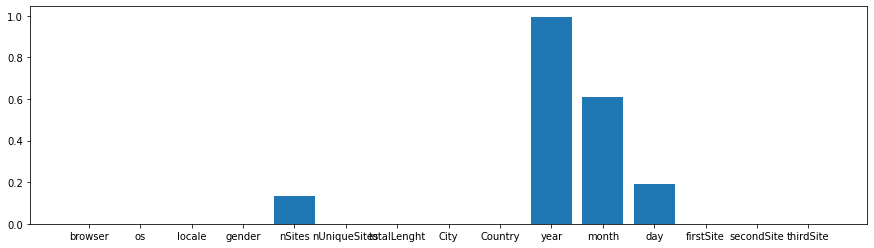

In [259]:
plt.figure( figsize = (15,4 ))
plt.bar( x = X.columns, height = p_val)

In [260]:
X.drop(labels = ['year','day','month','nSites'], axis = 1, inplace = True)

#### Scaling and Normalisation

<AxesSubplot:ylabel='Frequency'>

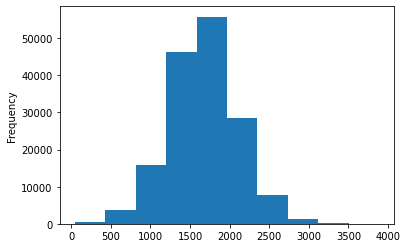

In [264]:
X.totalLenght.plot.hist() # already normal distribution

In [288]:
from sklearn.preprocessing import MinMaxScaler

mlm = MinMaxScaler()

In [290]:
X = mlm.fit_transform( X )

### Handle the Target Imbalance

1. Rnadom Oversampling and Undersampling
2. SMOTE
3. ADSYNE

In [297]:
from imblearn.over_sampling import RandomOverSampler

In [298]:
oversample = RandomOverSampler( sampling_strategy='minority')

X_over, y_over = oversample.fit_resample(X, y)

AttributeError: 'RandomOverSampler' object has no attribute '_validate_data'